<a href="https://colab.research.google.com/github/Hinni79/deeplearningbook/blob/master/DLBook_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt 1: Lineare Regression
## Schritt 1: Datengenerierung und Visualisierung

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
np.random.seed(42)
my_weight = 4

TensorFlow 1.x selected.


In [0]:
# Array mit 100 Werten generieren
input = np.arange(0,10,0.1)
noise = np.random.randint(low=1, high=10, size=input.shape)
output = my_weight * input + noise

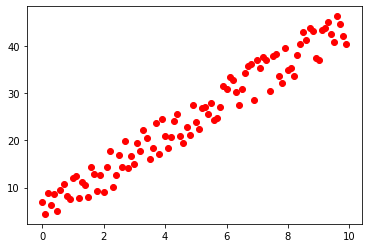

In [3]:
plt.scatter(input, output, c="red")
plt.show()

## Schritt 2: Modell erstellen
X wird mit w multipliziert und b addiert

In [0]:
def linear_regression_model(X, w, b):
    return tf.add(tf.multiply(X, w), b)

# Platzhalter für X und Y erstellen
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")
# Variablen für w und b erstellen
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [0]:
# Cost function
cost = tf.square(Y - linear_regression_model(X, w, b))
train_op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

## Schritt 3: Modell trainieren
For-Schleife über die Anzahl der Epochen, die Trainingsoperation ausführen mit den Trainingswerten. Anschliessend Gewichte und Bias auswerten.

In [0]:
epochs = range(0,100)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in epochs:
        print("--- Epoch {} ---".format(i))
        for (x,y) in zip(input,output):
            sess.run(train_op, feed_dict={X:x, Y:y})
        
        weight_value = sess.run(w)
        bias_value = sess.run(b)

        print("bias_value: {}".format(bias_value))
        print("weight_value: {}".format(weight_value))